# Chinese Stock Indices Analysis   

### Abstract 

The stock markets of emerging market play more important roles in global finacial market. China is one of the largest countries worldwide with a real GDP growth of more than 6%. This report will illustrate the change in price of three major china stock indices during the year of 2013 to 2016. A detailed analysis of these indices will be demonstrated as well.

### Introduction 

As far as know, there are 3 major stock indices in U.S stock market, which are Dow Jones Industrial Average (DJIA), Standard & Poor's 500 (S&P 500), and  NASDAQ-100. The counterparts of these 3 indices in China stock market are Shanghai Stock Exchange 50 (SSE 50 Index)，China Securities Index Company 300 (CSI 300 Index) and Growth Enterprise Index (GEI). SSE 50 Index selects 50 largest stocks of good liquidity and representativeness from Shanghai security market similar to DJIA of U.S. CSI 300 Stock Index (CSI 300), the first equity index jointly launched by the Shanghai Stock Exchange and the Shenzhen Stock Exchange, aims to reflect the price fluctuation and performance of China’s top 300 shares by market capitalization, similar to S&P 500 of U.S. The Growth Enterprise Index (GEI) is made up of 100 largest new business companies in China Growth Market. This report will analyse the price change of SSE 50 Index (referred as c_DJIA), CSI 300 Index (referred as c_SP500) and Growth Enterprise Index (referred as c_NASDAQ).  

This report will seek to answer the following questions:
    
    1.) What was the change in price of the stock indices over time?
    2.) What was the daily return of the stock indices on average?
    3.) What was the moving average of various stock indices?
    4.) What was the correlation between different stock indices' closing prices?
    5.) What was the correlation between different stock indices' daily returns?
    6.) How much value do we put at risk by investing in a particular stock index?

### Q1 - Basic Analysis of Stock Indices Information

In [72]:
#start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

# For division
from __future__ import division

First we read the data to see how it looks like.

The three datasets are provided from https://github.com/waditu/tushare. The first dataset is a huge data about all prices of SSE 50 Index (referred as c_DJIA) from 2013 to 2016. The second dataset is a huge data about all prices of CSI 300 Index (referred as c_SP500) from 2013 to 2016. The third dataset is a huge data about all prices of Growth Enterprise Index (referred as c_NASDAQ) from 2013 to 2016.


In [73]:
c_DJIA = pd.read_excel("c_DJIA.xlsx","Sheet1",index_col="date",na_values=["NA"])
c_SP500 = pd.read_excel("c_SP500.xlsx","Sheet1",index_col="date",na_values=["NA"])
c_NASDAQ = pd.read_excel("c_NASDAQ.xlsx","Sheet1",index_col="date",na_values=["NA"])

In [74]:
pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",6)
pd.set_option("display.width",78)
pd.set_option("precision",4)

In [75]:
c_DJIA_a = c_DJIA.sort_index(axis=0, ascending=True)
c_DJIA_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-08-14,1622.209,1643.000,1610.218,1605.283,236975.62,-9.525,-0.59,1610.218,1610.218,1610.218,236975.62,236975.62,236975.62
2013-08-15,1608.621,1624.335,1595.152,1593.689,195204.67,-15.066,-0.94,1602.685,1602.685,1602.685,216090.15,216090.15,216090.15
2013-08-16,1590.915,1711.432,1592.794,1573.720,527554.00,-2.358,-0.15,1599.388,1599.388,1599.388,319911.43,319911.43,319911.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-02,2145.820,2151.290,2148.450,2138.190,125921.11,0.890,0.04,2157.806,2163.322,2171.041,230544.93,199204.53,239648.17
2016-08-03,2140.150,2149.890,2145.790,2136.600,153068.94,-2.660,-0.12,2152.170,2161.189,2169.975,185289.11,199949.50,235032.39
2016-08-04,2145.660,2146.600,2143.840,2130.170,149556.62,-1.950,-0.09,2148.176,2157.795,2168.824,163449.58,196858.41,229021.37


In [76]:
c_SP500_a = c_SP500.sort_index(axis=0, ascending=True)
c_SP500_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-08-14,2362.619,2386.599,2349.080,2340.833,75942128,-9.988,-0.42,2349.080,2349.080,2349.080,7.5942e+07,7.5942e+07,7.5942e+07
2013-08-15,2348.839,2362.089,2321.576,2319.784,61951852,-27.504,-1.17,2335.328,2335.328,2335.328,6.8947e+07,6.8947e+07,6.8947e+07
2013-08-16,2314.261,2423.081,2304.144,2295.023,120369560,-17.432,-0.75,2324.933,2324.933,2324.933,8.6088e+07,8.6088e+07,8.6088e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-02,3173.757,3189.052,3189.052,3165.542,62167640,12.243,0.39,3201.834,3222.493,3233.332,1.0204e+08,9.0617e+07,1.0675e+08
2016-08-03,3179.684,3197.157,3193.507,3173.535,72864104,4.455,0.14,3196.887,3218.083,3232.167,8.4572e+07,9.0634e+07,1.0415e+08
2016-08-04,3190.546,3201.553,3201.288,3170.418,73504376,7.781,0.24,3192.917,3212.960,3231.734,7.6717e+07,8.9384e+07,1.0190e+08


In [77]:
c_NASDAQ_a = c_NASDAQ.sort_index(axis=0, ascending=True)
c_NASDAQ_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-08-14,1175.625,1186.293,1180.656,1160.022,6317244.0,8.327,0.71,1180.656,1180.656,1180.656,6.3172e+06,6.3172e+06,6.3172e+06
2013-08-15,1177.854,1184.399,1167.094,1165.769,5916297.5,-13.562,-1.15,1173.875,1173.875,1173.875,6.1168e+06,6.1168e+06,6.1168e+06
2013-08-16,1158.962,1178.843,1132.086,1131.444,5759879.5,-35.008,-3.00,1159.945,1159.945,1159.945,5.9978e+06,5.9978e+06,5.9978e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-02,2096.550,2114.953,2113.214,2094.116,7552176.0,14.035,0.67,2125.987,2193.903,2224.264,1.3067e+07,1.3318e+07,1.5273e+07
2016-08-03,2110.234,2117.617,2108.314,2096.731,7799222.5,-4.900,-0.23,2116.573,2177.881,2217.602,1.0176e+07,1.2603e+07,1.4976e+07
2016-08-04,2107.623,2133.176,2129.652,2102.272,9103905.0,21.338,1.01,2114.554,2164.334,2212.388,9.1407e+06,1.2058e+07,1.4591e+07


Now that we've seen all DataFrames, let's plot out closing prices of all three stock indices.

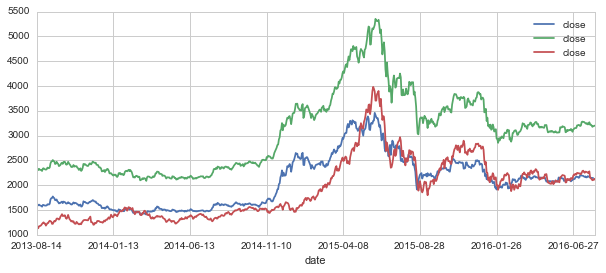

In [78]:
# historical view of the closing price
c_DJIA_a['close'].plot(legend=True,figsize=(10,4))
c_SP500_a['close'].plot(legend=True,figsize=(10,4))
c_NASDAQ_a['close'].plot(legend=True,figsize=(10,4))

The prices of three stock indices went through a coutinous upward tendacy from 07/2014 to 06/2015. But the prices went through a sharp decline of 1/2 from 06/2015 to 08/2016. 
The green line stands for c_SP500, the blue line stands for c_DJIA and the red line stands for c_NASDAQ. As time went on, the striking contrast between the prices of c_DJIA and c_NASDAQ (1622.209 vs 1175.625 in the beginning) faded away to about the same (2145.660 vs 2107.623), with c_DJIA still slightly more.

### Q2 - Daily Return Analysis

Now that we've done some baseline analysis, let's dive a little deeper. We're now going to analyze the risk of the stock indices. In order to do so we'll need to take a closer look at the daily changes of the index, and not just its absolute value. Let's use pandas to retrieve the daily returns for all stock indices.

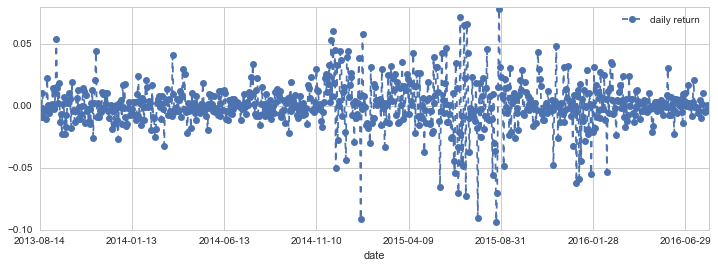

In [79]:
# We'll use pct_change to find the percent change for each day
c_DJIA_a['daily return'] = c_DJIA_a['close'].pct_change()
# Then we'll plot the daily return percentage
c_DJIA_a['daily return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Most of the daily changes of price of c_DJIA index sets between -5% to 5%, which is similar to c_SP500 and c_NASDAQ.

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

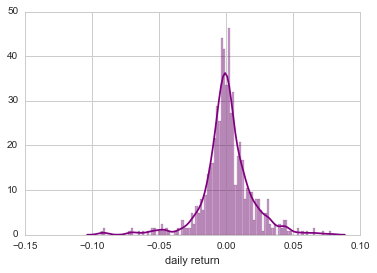

In [80]:
# the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(c_DJIA_a['daily return'].dropna(),bins=100,color='purple')

The daily returns of c_DJIA index is normally distributed, which is similar to c_SP500 and c_NASDAQ. The extreme daily returns of all three indices are less than 10%, which fits in the regulation of china stock market with regard to daily price changes of all stocks.  

### Q3 - Moving Average Analysis

Now that we've seen the visualizations for the closing price each day, let's caculate the moving average for the stock indices. 

In [81]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [5,20,60]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    c_DJIA_a[column_name]=pd.rolling_mean(c_DJIA_a['close'],ma)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()


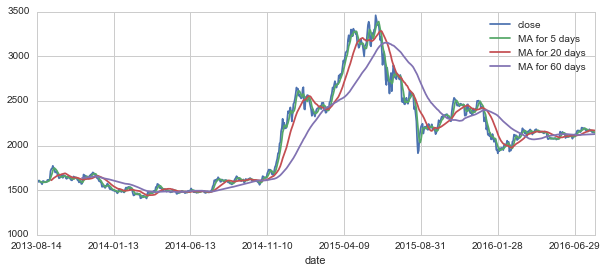

In [82]:
c_DJIA_a[['close','MA for 5 days','MA for 20 days','MA for 60 days']].plot(subplots=False,figsize=(10,4))

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 5 days (1 week), 20 days (1 month), 60 days (3 months), or any time period the trader chooses. MAs also impart important trading signals on their own, or when two averages cross over. A rising MA indicates that the security is in an uptrend, while a declining MA indicates that it is in a downtrend. Similarly, upward momentum is confirmed with a bullish crossover, which occurs when a short-term MA crosses above a longer-term MA. Downward momentum is confirmed with a bearish crossover, which occurs when a short-term MA crosses below a longer-term MA. A detailed analyis of Moving Average will be demonstrated on project 2 by simulation of one trader's account.

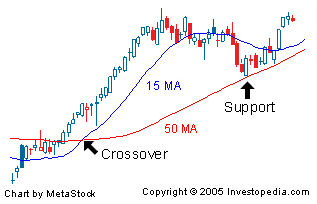

In [65]:
from PIL import Image
import urllib, cStringIO

URL='http://i.investopedia.com/inv/dictionary/terms/MovingAverage2.gif'
file = cStringIO.StringIO(urllib.urlopen(URL).read())
img = Image.open(file)
img

### Q4, Q5- Correlation Analysis of Closing Prices and Daily Returns 

Now we wanalyze the returns of all the stock indices in our list. Let's build a DataFrame with all the ['close'] columns for each of the indices dataframes.

In [83]:
## Grab all the closing prices for the stock indices list into one DataFrame
df_close = pd.DataFrame({
        'c_DJIA': c_DJIA_a.close, 'c_SP500': c_SP500_a.close, 'c_NASDAQ': c_NASDAQ_a.close
    },index = c_DJIA_a.index)
df_close

,c_DJIA,c_NASDAQ,c_SP500
date,,,
2013-08-14,1610.218,1180.656,2349.080
2013-08-15,1595.152,1167.094,2321.576
2013-08-16,1592.794,1132.086,2304.144
...,...,...,...
2016-08-02,2148.450,2113.214,3189.052
2016-08-03,2145.790,2108.314,3193.507
2016-08-04,2143.840,2129.652,3201.288


Now that we have all the closing prices, let's go ahead and get the daily return for all the stock indices.

In [84]:
# Make a new index returns DataFrame
index_rets = df_close.pct_change()

The pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of indices in our stock index ticker list. We can use sns.pairplot() to automatically create this plot.

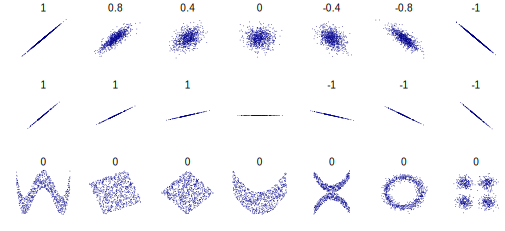

In [60]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

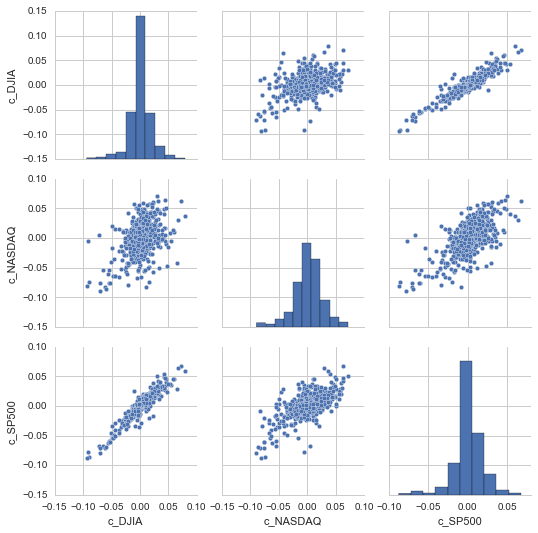

In [85]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(index_rets.dropna())

Above we can see all the relationships on daily returns between all the stock indices. A quick glance shows an stronger correlation between c_DJIA and c_SP500 daily returns. The reason is that SSE 50 Index (referred as c_DJIA) and CSI 300 Index (referred as c_SP500) are composed of similar stocks which mainly belongs to financial and real estate fields, while Growth Enterprise Index (referred as c_NASDAQ) is composed of stocks which are tech and biomedical companies.

It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an demonstration of utilizing the full power of seaborn to achieve this result.

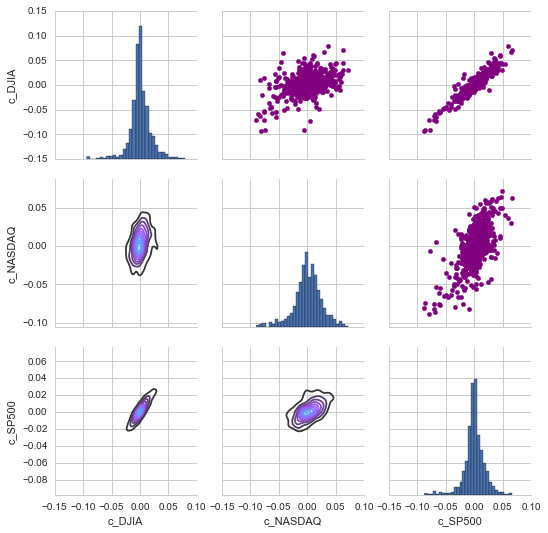

In [86]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(index_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique.

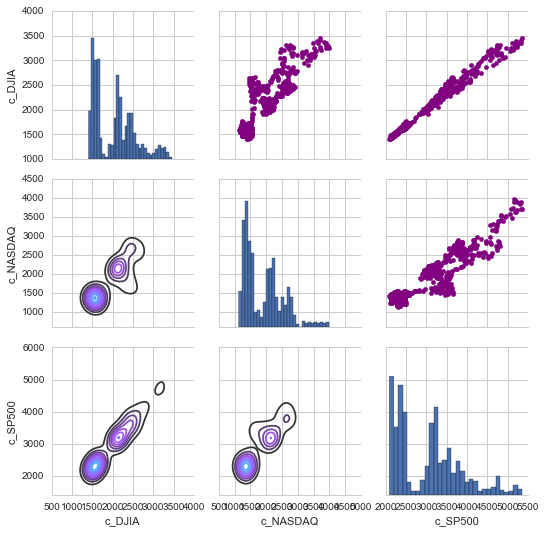

In [43]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(df_close)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Above we can see all the relationships on closing prices between all the stock indices. A quick glance shows an stronger correlation between c_DJIA and c_SP500 closing prices. And all the closing prices of indices are positively correlated. The reason might be the same as the case in the daily returns.

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the indices' daily return values as shown experiment notebook. 

### Q6 - Risk Analysis

Now that we've done some daily return analysis, let's start looking deeper into actual risk analysis. There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [48]:
# Let's start by defining a new DataFrame as a clenaed version of the original index_rets DataFrame
rets = index_rets.dropna()
 
#mean of daily returns
rets.mean()

c_DJIA      0.0006
c_NASDAQ    0.0011
c_SP500     0.0006
dtype: float64

In [49]:
#standard deviation of daily returns
rets.std()

c_DJIA      0.0187
c_NASDAQ    0.0248
c_SP500     0.0182
dtype: float64

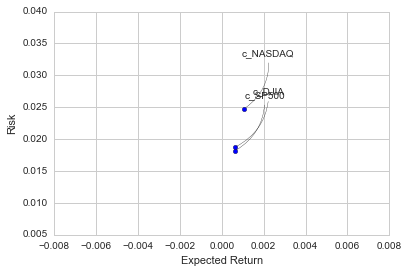

In [50]:
### size of the dot
area = np.pi *20

#Make a scatter plot of x vs y, mean of daily returns as x-axis, std of daily returns as y-axis
plt.scatter(rets.mean(),rets.std())   
  
#Set the plot axis titles
plt.xlabel("Expected Return")     
plt.ylabel("Risk")
  
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = "offset points",ha = "right",va = "bottom",
        arrowprops = dict(arrowstyle = "-",connectionstyle = "arc3,rad=-0.3"))

This figure shows that investing c_NASDAQ produced highest expected return (highest mean of daily returns), along with highest risk (highest standard deviation of the daily returns. And investing c_DJIA and c_SP500 produced same expected return, but investing c_SP500 holded lower risk.

###  Q6 - Value at Risk using the "bootstrap" method

Let's go ahead and define a value at risk parameter (VaR) for our stock indices. We can treat value at risk (VaR) as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There are several methods we can use for estimating a value at risk. The most common two are using the "bootstrap" method and the Monte Carlo method. 

We will use the "bootstrap" method to evaulate value at risk. For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile.

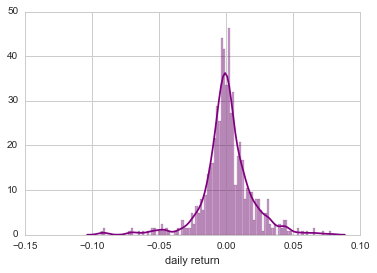

In [66]:
sns.distplot(c_DJIA_a['daily return'].dropna(),bins=100,color='purple')

In [67]:
rets['c_DJIA'].quantile(0.05)

-0.025861416771458

The 0.05 empirical quantile of daily returns is at -0.0259. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment on c_DJIA, our one-day 5% VaR is 0.0259 * 1,000,000 = $25,900.

Repeat this for the other two indices.

In [69]:
rets['c_NASDAQ'].quantile(0.05)

-0.044549694424439554

For c_NASDAQ, the 0.05 empirical quantile of daily returns is at -0.0445. That means that with 95% confidence, our worst daily loss will not exceed 4.5%. If we have a 1 million dollar investment on c_NASDAQ, our one-day 5% VaR is 0.0445 * 1,000,000 = $44,500.

In [70]:
rets['c_SP500'].quantile(0.05)

-0.027171405949020344

For c_SP500, the 0.05 empirical quantile of daily returns is at -0.0272. That means that with 95% confidence, our worst daily loss will not exceed 2.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0272 * 1,000,000 = $27,200.

As shown above, investing on Growth Enterprise Index (GEI) (referred as c_NASDAQ) holds greatest risk, while investing SSE 50 Index (referred as c_DJIA) holds lowest risk.

# Conclusion

This report analyses the price change of SSE 50 Index (referred as c_DJIA), CSI 300 Index (referred as c_SP500) and Growth Enterprise Index (referred as c_NASDAQ) in china stock market from 08/2013 to 08/2016. As time went on, the striking contrast between the prices of c_DJIA and c_NASDAQ faded away to about the same, with c_DJIA still slightly more. And there is stronger correlation between c_DJIA and c_SP500 closing prices as well as daily returns. Furthermore, all the closing prices and daily returns of indices are positively correlated. In the end, risk analysis shows that investing c_NASDAQ produced highest expected return along with highest risk, while investing other indices produced similar expected return with similar risk.

In [87]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>